### Class 09 

### Unsupervised Learning

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [34]:
# test data

iris_df = pd.DataFrame(iris.data)
#iris_df.describe()
#iris_df.columns = pd.feature_targets()
iris_df.head()


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
#iris_df.value_counts()

In [7]:
X.shape, y.shape

((150, 4), (150,))

In [8]:
# Standardaization

from sklearn.preprocessing import StandardScaler

# only on features
X_new = StandardScaler().fit_transform(X)

In [13]:
# mean of the vectors

mean_vec = np.mean(X_new, axis=0)
mean_vec

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [22]:
# Covariance Matrix

cov_mat = ((X_new - mean_vec).T.dot((X_new - mean_vec))) / (X_new.shape[0] - 1)
#cov_mat
print('covariance matrix\n', cov_mat)

covariance matrix
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [24]:
# Covariance Matrix the short way

print('numpy covariance matrix\n', np.cov(X_new.T))

numpy covariance matrix
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [25]:
eig_vals, eig_vecs = np.linalg.eig(np.cov(X_new.T))
print('Eigenvalues:\n%s'%eig_vals)
print('Eigenvectors:\n%s'%eig_vecs)

Eigenvalues:
[2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [38]:
u, s, v = np.linalg.svd(X_new.T)
v

array([[ 1.08239531e-01,  9.94577561e-02,  1.12996303e-01, ...,
        -7.27030413e-02, -6.56112167e-02, -4.59137323e-02],
       [-4.09957970e-02,  5.75731483e-02,  2.92000319e-02, ...,
        -2.29793601e-02, -8.63643414e-02,  2.07800179e-03],
       [ 2.72186462e-02,  5.00034005e-02, -9.42089147e-03, ...,
        -3.84023516e-02, -1.98939364e-01, -1.12588405e-01],
       ...,
       [ 5.43380310e-02,  5.12936114e-03,  2.75184277e-02, ...,
         9.89532683e-01, -1.41206665e-02, -8.30595907e-04],
       [ 1.96438400e-03,  8.48544595e-02,  1.78604309e-01, ...,
        -1.25488246e-02,  9.52049996e-01, -2.19201906e-02],
       [ 2.46978090e-03,  5.83496936e-03,  1.49419118e-01, ...,
        -7.17729676e-04, -2.32048811e-02,  9.77300244e-01]])

In [39]:
u

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

In [41]:
s

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [50]:
cor_mat1 = np.corrcoef(X_new.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

In [51]:
cor_mat2 = np.corrcoef(X.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

In [ ]:
# selecting the principal components 
# sorting eigen pairs

for ev in eig_vecs.T:
    np.testing.assert_array_equal(1.0, np.linalg.norm(ev))
print('Everything Okay')

In [57]:
eig_pairs = [ (np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range (len(eig_vals)) ]
eig_pairs.sort(key = lambda x : x[0], reverse=True)

In [59]:
for i in eig_pairs:
    print(i[0])

2.9184978165319957
0.9140304714680701
0.14675687557131495
0.020714836428618884


In [63]:
### explained variance
tot = sum(eig_vals)
var_exp = [ (i / tot) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

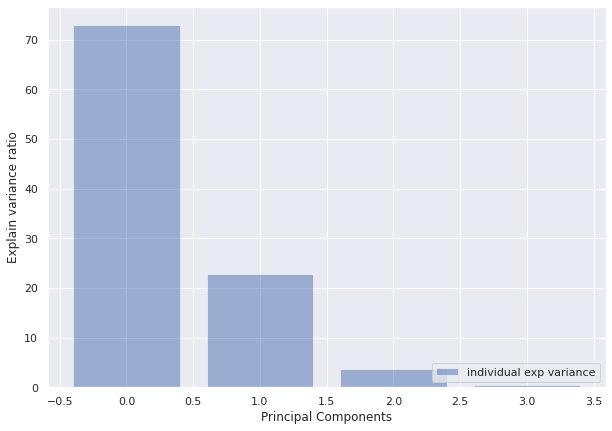

In [69]:
plt.figure(figsize=(10,7))
plt.bar(range(4), var_exp, alpha=0.5, align='center', label='individual exp variance' )
plt.ylabel('Explain variance ratio')
plt.xlabel('Principal Components')
plt.legend(loc=4);

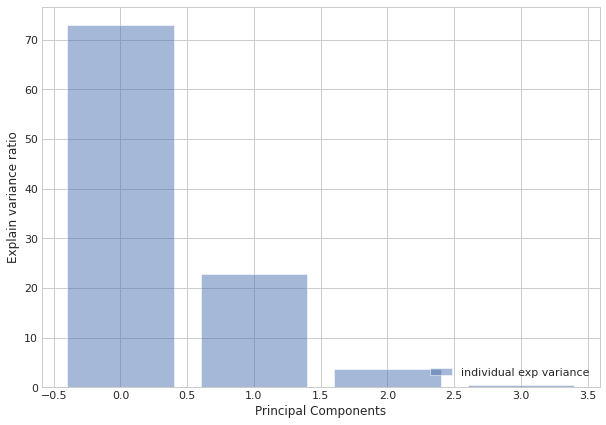

In [70]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10,7))
    plt.bar(range(4), var_exp, alpha=0.5, align='center', label='individual exp variance' )
    plt.ylabel('Explain variance ratio')
    plt.xlabel('Principal Components')
    plt.legend(loc=4);


### using the machine learning way 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_std = pca.fit_transform(X_new)

No handles with labels found to put in legend.


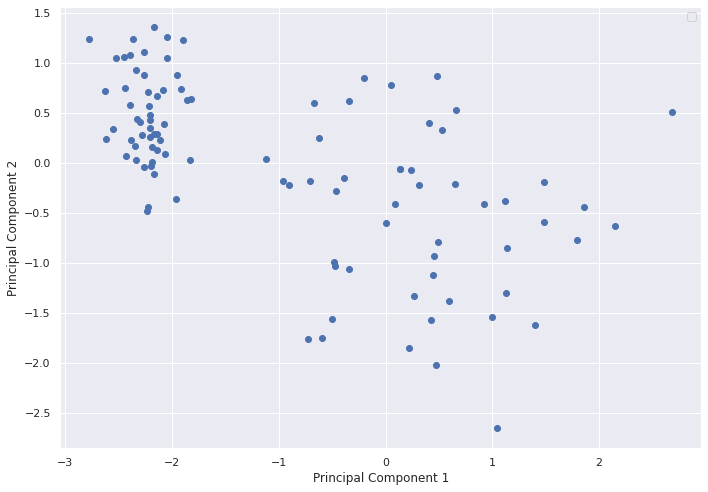

In [80]:
plt.figure(figsize=(10,7))
plt.scatter(X_std[y==0], X_std[y==1])
plt.legend(loc='best')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout();

<ipython-input-94-d7ecca905d84>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  plt.scatter(X_std[y==lab, 0],
<ipython-input-94-d7ecca905d84>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_std[y==lab, 1],


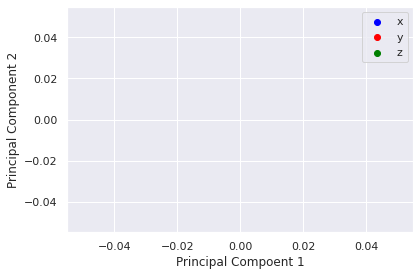

In [94]:
for lab, col in zip(('x', 'y', 'z'), ('blue', 'red', 'green')):
        plt.scatter(X_std[y==lab, 0],
                    X_std[y==lab, 1],
                    label=lab,
                    c=col)
        plt.xlabel('Principal Compoent 1')
        plt.ylabel('Principal Component 2')
        plt.legend(loc='best')
        plt.tight_layout();
        #plt.show()